In [239]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [240]:
url="https://www.mohfw.gov.in/"

In [241]:
response=requests.get(url)
print(response)

<Response [200]>


In [242]:
#created a wrapper

soup=BeautifulSoup(response.content,"html.parser")

In [243]:
soup.title

<title>MoHFW | Home</title>

In [244]:
# tables=soup.find_all("table")
# table0=tables[0]
# table0
# list_data=[]

# data={
#     "State":None,
#     "Total_confirmed_cases":None,
#     "Cured_discharged_migrated":None,
#     "Deaths":None
# }

# rows=table0.find_all("tr")[1:-3]

# for row in rows:
#     col=row.find_all("td")
#     data={
#     "State":None,
#     "Total_confirmed_cases":None,
#     "Cured_discharged_migrated":None,
#     "Deaths":None}
    
#     try:
        
#         data["State"]=col[1].text.strip()
#         data["Total_confirmed_cases"]=int(col[2].text.strip())
#         data["Cured_discharged_migrated"]=int(col[3].text.strip())
#         data["Deaths"]=int(col[4].text.strip())
#         list_data.append(data)
        
#     except:
#         print("Blank")
# #print(list_data)
# print(sorted(list_data,key=itemgetter('Total_confirmed_cases'),reverse=True))

# Below 4 lists are made in order to take all values into consideration

In [245]:
state=[]
total_confirmed_cases=[]
cured_discharged_migrated=[]
deaths=[]

rows=table0.find_all("tr")
rows
for row in rows:
    col=row.find_all("td")
    try:
        
        state.append(col[1].text.strip())
        total_confirmed_cases.append(int(col[2].text.strip()))
        cured_discharged_migrated.append(int(col[3].text.strip()))
        deaths.append(int(col[4].text.strip()))
    except:
        print("")
        
print(state)






['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', '27892*']


# Converted all the lists into a single dataframs consisting of all the columns

In [246]:
df=pd.DataFrame(list(zip(state,total_confirmed_cases,cured_discharged_migrated,deaths)),columns=["State",
"Total_confirmed_cases",
"Cured_Discharged_Migrated",
"Deaths"])

df

,State,Total_confirmed_cases,Cured_Discharged_Migrated,Deaths
0,Andaman and Nicobar Islands,33,11,0
1,Andhra Pradesh,1097,231,31
2,Arunachal Pradesh,1,1,0
3,Assam,36,27,1
4,Bihar,274,56,2
5,Chandigarh,30,17,0
6,Chhattisgarh,37,32,0
7,Delhi,2918,877,54
8,Goa,7,7,0
9,Gujarat,3301,313,151


# Sorted the dataframe by Total Confirmed Cases

In [247]:

from operator import itemgetter
df2=df.sort_values("Total_confirmed_cases",ascending=False)
#lt.rcParams['figure.figsize']=(40,25)
df2


,State,Total_confirmed_cases,Cured_Discharged_Migrated,Deaths
18,Maharashtra,8068,1076,342
9,Gujarat,3301,313,151
7,Delhi,2918,877,54
25,Rajasthan,2185,518,33
17,Madhya Pradesh,2096,302,103
26,Tamil Nadu,1885,1020,24
30,Uttar Pradesh,1868,289,29
1,Andhra Pradesh,1097,231,31
27,Telengana,1002,280,26
31,West Bengal,649,105,20


# Plotted a multiple bar plot

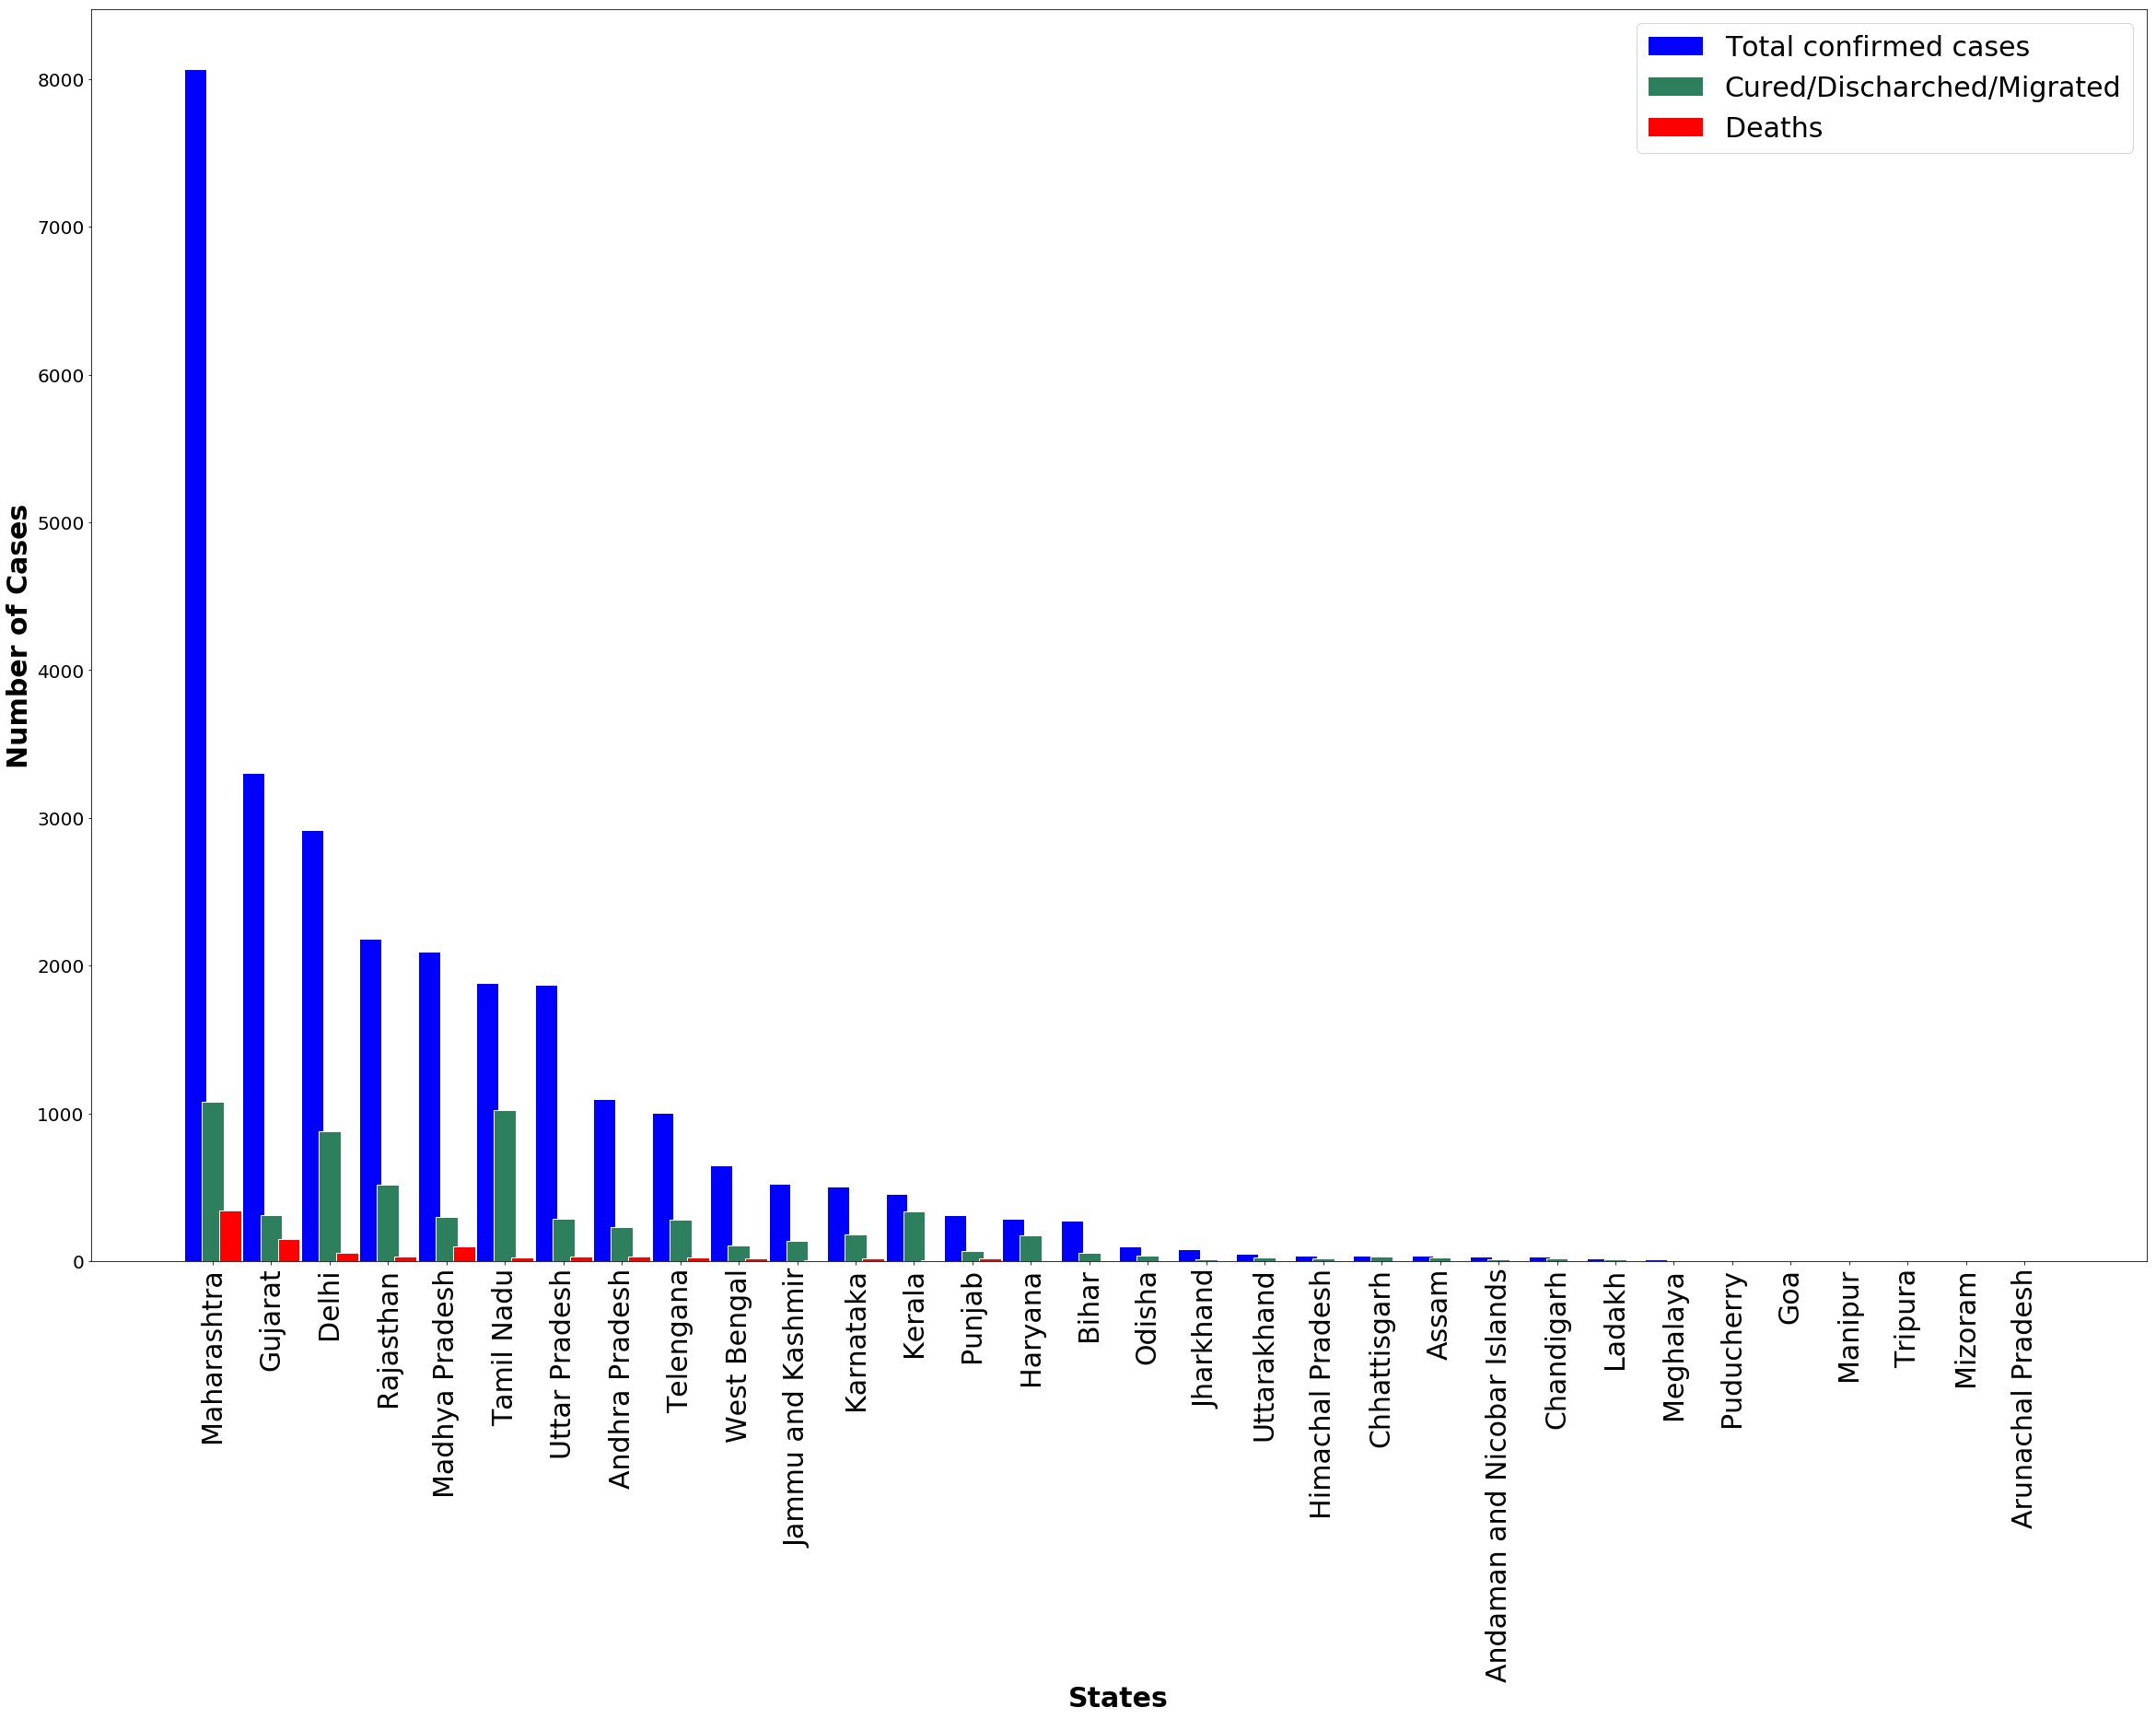

In [248]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
 
# set height of bar
bars1 = df2["Total_confirmed_cases"].to_numpy()
bars2 =  df2["Cured_Discharged_Migrated"].to_numpy()
bars3 = df2["Deaths"].to_numpy()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.figure(figsize=(40,25))
# Make the plot
plt.bar(r1, bars1, color='blue', width=1.25*barWidth, edgecolor='white', label='Total confirmed cases')
plt.bar(r2, bars2, color='#2d7f5e', width=1.25*barWidth, edgecolor='white', label='Cured/Discharched/Migrated')
plt.bar(r3, bars3, color='red', width=1.25*barWidth, edgecolor='white', label='Deaths')
 
# Add xticks on the middle of the group bars
plt.ylabel('Number of Cases', fontweight='bold',fontsize="30",rotation="vertical")
plt.xlabel('States', fontweight='bold',fontsize="30")
plt.xticks([r + barWidth for r in range(len(bars1))], df2["State"],rotation="vertical",fontsize="30")
plt.yticks(fontsize="20")


# Create legend & Show graphic
plt.legend(fontsize="30")
plt.show()


# A pie plot based on total confirmed cases

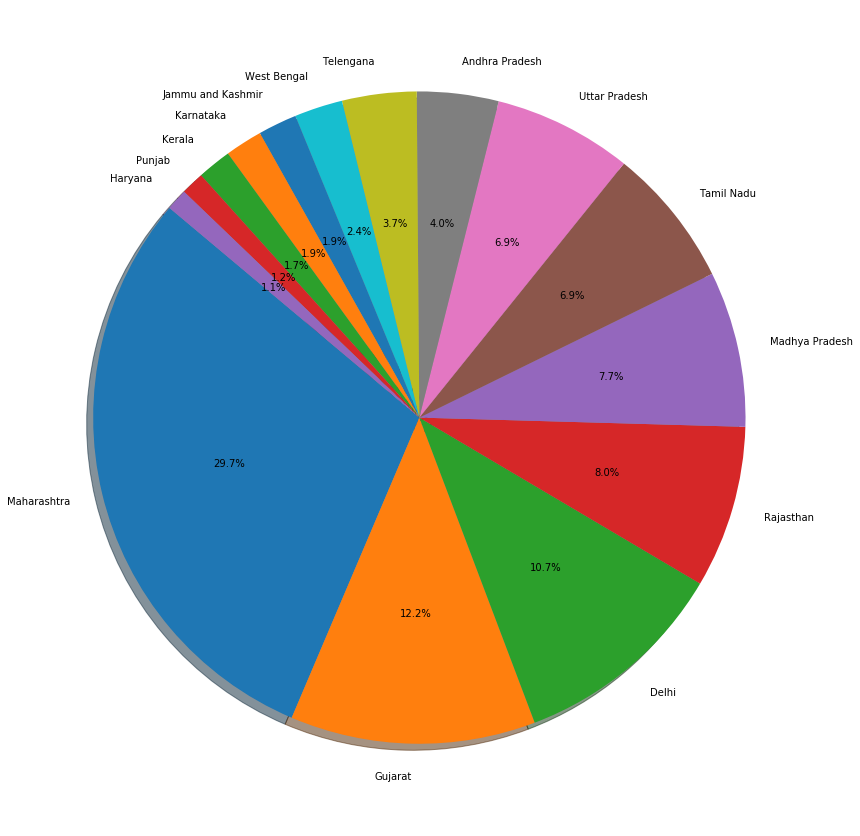

In [249]:
df3=df2.iloc[:15]
df3
plt.figure(figsize=(15,15))
labels=df3["State"]
plt.figsize=(2,5)
sizes=df3["Total_confirmed_cases"]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis=('equal')
plt.show()